In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.analysis.resonator.helpers import *

In [3]:
from kid_readout.analysis.resonator import lmfit_models

In [4]:
cable = lmfit_models.GeneralCableModel()

In [5]:
params = cable.make_params(delay=1e-6,phi=1,f_min=100.0e6,A_mag=1.0,A_slope=10e-6)

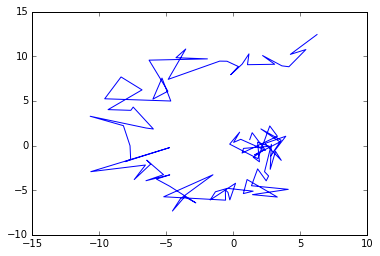

In [6]:
plot_ri((cable.eval(f=np.linspace(100e6,101e6,100),params=params))+complex_gaussian((100,)))

In [7]:
f=np.linspace(100e6,101e6,100)
truth = cable.eval(f=np.linspace(100e6,101e6,100),params=params)

In [8]:
measurements = truth + complex_gaussian((1000,100))

In [9]:
import kid_readout.analysis.lmfit_fitter

In [10]:
k = 0
fitter = kid_readout.analysis.lmfit_fitter.FitterWithAttributeAccess(f=f,data=measurements[k,:],model=lmfit_models.GeneralCableModel)

In [11]:
fitter.fit()

In [12]:
fitter.model.guess(f=f,data=measurements[k,:])

Parameters([('delay',
             <Parameter 'delay', 1.0046914882058554e-06, bounds=[-inf:inf]>),
            ('phi',
             <Parameter 'phi', 1.0209180195422842, bounds=[-3.141592653589793:3.141592653589793]>),
            ('f_min',
             <Parameter 'f_min', value=100000000.0 (fixed), bounds=[-inf:inf]>),
            ('A_mag', <Parameter 'A_mag', 1.1921166208102174, bounds=[0:inf]>),
            ('A_slope',
             <Parameter 'A_slope', 8.2525492711615502e-06, bounds=[-inf:inf]>)])

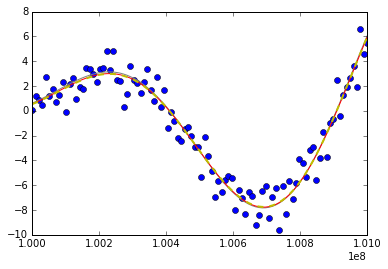

In [27]:
fitter.plot()
plot(f,truth,'y--',lw=2)

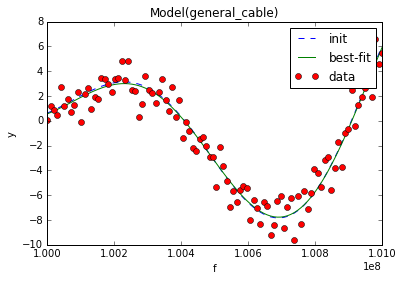

In [29]:
fitter.current_result.plot_fit()

In [21]:
fitter.A_mag_error

0.19297321200885362

In [22]:
fitter.A_mag

1.0304855475287198

In [24]:
fitter.phi_error

0.051625515234724292

In [ ]:
fitter.__dict__.keys()